In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
sns.set()
from matplotlib import style
from matplotlib.backends.backend_pdf import PdfPages
%matplotlib inline
# plt.style.use('fivethirtyeight')
plt.style.use(['ggplot'])
%config IPCompleter.greedy=True
from IPython.display import display
from IPython.display import Image

In [2]:
def makeDataFrame(jsonData):
    listOfId=[]
    listOfGenre=[]
    for i in jsonData['items']:
        listOfId.append(i['id'])
        listOfGenre.append(i['snippet']['title'])

    genreIds={}
    genreIds['id']=listOfId
    genreIds['Genre']=listOfGenre
    genreDf=pd.DataFrame.from_dict(genreIds)
    return genreDf

In [3]:
uk_json = pd.read_json("GB_category_id.json", orient='columns', typ='frame', dtype=True, convert_axes=True,)

In [4]:
genre = makeDataFrame(uk_json)

In [5]:
genre = genre.reset_index(drop = True)

#### How to append categories to dataframe based on id

In [6]:
GB_csv = pd.read_csv("GBvideos.csv")

In [7]:
#rename category_id to id
GB_youtube_df = GB_csv.rename(columns={'category_id': 'id'})

In [8]:
GB_youtube_df.head(1)

,video_id,trending_date,title,channel_title,id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...


In [9]:
GB_youtube_df['id'].dtype

dtype('int64')

In [10]:
genre['id'].dtype

dtype('O')

In [11]:
#Need to cast both id's to the same type
genre['id'] = genre['id'].astype(int)

In [12]:
GB_concat = pd.merge(GB_youtube_df, genre, on=['id'],how='left')

In [13]:
GB_concat

,video_id,trending_date,title,channel_title,id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Genre
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,Howto & Style
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...,Entertainment
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Music
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,Sports
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,News & Politics
5,AumaWl0TNBo,17.14.11,How My Relationship Started!,PointlessBlogVlogs,24,2017-11-11T17:00:00.000Z,"pointlessblog|""pointlessblogtv""|""pointlessblog...",1182775,52708,1431,2333,https://i.ytimg.com/vi/AumaWl0TNBo/default.jpg,False,False,False,► HOW MY RELATIONSHIP STARTED!\n► PB Merch • h...,Entertainment
6,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634124,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Music
7,-N5eucPMTTc,17.14.11,CHRISTMAS HAS GONE TO MY HEAD,MoreZoella,22,2017-11-10T19:19:43.000Z,"zoe sugg|""zoella""|""zoe""|""vlog""|""vlogging""|""vlo...",1164201,57309,749,624,https://i.ytimg.com/vi/-N5eucPMTTc/default.jpg,False,False,False,CHRISTMAS HAS GONE TO MY HEAD\nPrevious Vlog: ...,People & Blogs
8,LMCuKltaY3M,17.14.11,Elbow - Golden Slumbers (John Lewis Advert 2017),ElbowVEVO,10,2017-11-10T08:00:01.000Z,"Elbow|""Golden""|""Slumbers""|""Polydor""|""Alternative""",154494,2163,147,211,https://i.ytimg.com/vi/LMCuKltaY3M/default.jpg,False,False,False,"“Golden Slumbers”, originally by The Beatles, ...",Music
9,9t9u_yPEidY,17.14.11,"Jennifer Lopez - Amor, Amor, Amor (Official Vi...",JenniferLopezVEVO,10,2017-11-10T15:00:00.000Z,"Jennifer Lopez ft. Wisin|""Jennifer Lopez ft. W...",9548677,190084,15015,11473,https://i.ytimg.com/vi/9t9u_yPEidY/default.jpg,False,False,False,"Jennifer Lopez ft. Wisin - Amor, Amor, Amor (O...",Music


* `  Bar plots `


* `Analysis to visualise views/comment_count/likes/dislikes based on genre id`

### GB genre analysis

In [14]:
youtube_genre = GB_concat['Genre']

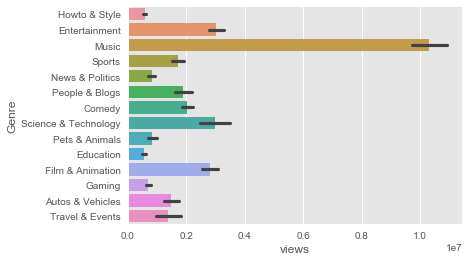

In [15]:
sns.barplot(y=youtube_genre, x=GB_concat['views'])

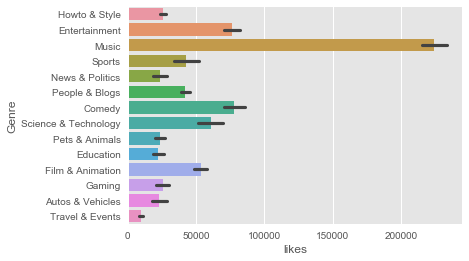

In [16]:
sns.barplot(x=GB_concat['likes'], y=youtube_genre)

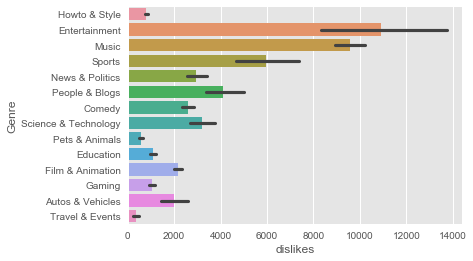

In [17]:
sns.barplot(y=youtube_genre, x=GB_concat['dislikes'])

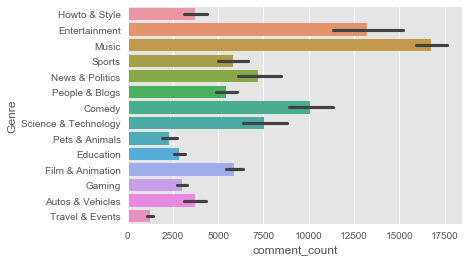

In [18]:
sns.barplot(y=youtube_genre, x=GB_concat['comment_count'])

In [19]:
#sns.countplot(x=GB_concat['comment_count'], hue=youtube_genre)

### US genre analysis

In [20]:
US_csv = pd.read_csv("USvideos.csv")

In [21]:
US_json = pd.read_json("US_category_id.json", orient='columns', typ='frame', dtype=True, convert_axes=True,)

In [22]:
#rename category_id to id
US_csv_df = US_csv.rename(columns={'category_id': 'id'})

In [23]:
genre = makeDataFrame(US_json)

In [24]:
#Need to cast both id's to the same type
genre['id'] = genre['id'].astype(int)

In [25]:
#US_concat = pd.concat([US_csv_df, genre],axis=1)
US_concat = pd.merge(US_csv_df, genre, on=['id'],how='left')

In [26]:
US_concat.head()

,video_id,trending_date,title,channel_title,id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Genre
0,2kyS6SvSYSE,17.14.11,WE WANT TO TALK ABOUT OUR MARRIAGE,CaseyNeistat,22,2017-11-13T17:13:01.000Z,SHANtell martin,748374,57527,2966,15954,https://i.ytimg.com/vi/2kyS6SvSYSE/default.jpg,False,False,False,SHANTELL'S CHANNEL - https://www.youtube.com/s...,People & Blogs
1,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97185,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146033,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,puqaWrEC7tY,17.14.11,Nickelback Lyrics: Real or Fake?,Good Mythical Morning,24,2017-11-13T11:00:04.000Z,"rhett and link|""gmm""|""good mythical morning""|""...",343168,10172,666,2146,https://i.ytimg.com/vi/puqaWrEC7tY/default.jpg,False,False,False,Today we find out if Link is a Nickelback amat...,Entertainment
4,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095731,132235,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment


In [27]:
US_genre = US_concat['Genre']

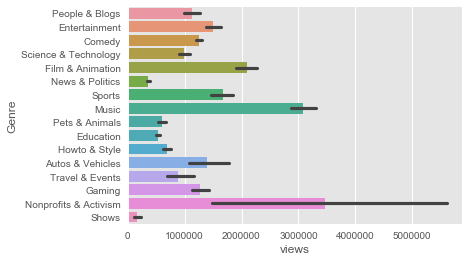

In [28]:
sns.barplot(y=US_genre, x=US_concat['views'])

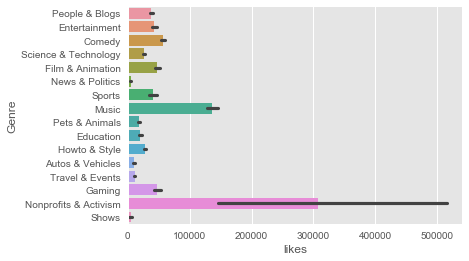

In [29]:
sns.barplot(y=US_genre, x=US_concat['likes'])

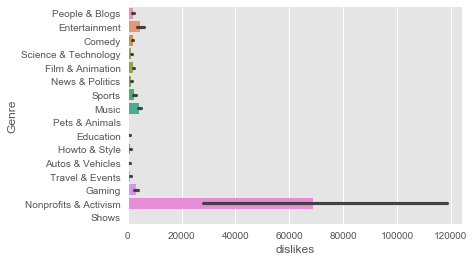

In [30]:
sns.barplot(y=US_genre, x=US_concat['dislikes'])

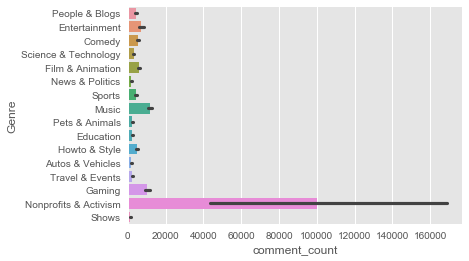

In [31]:
sns.barplot(y=US_genre, x=US_concat['comment_count'])

### Canada genre analysis

In [32]:
CA_csv = pd.read_csv("CAvideos.csv")

In [33]:
CA_json = pd.read_json("CA_category_id.json", orient='columns', typ='frame', dtype=True, convert_axes=True,)

In [34]:
#rename category_id to id
CA_csv_df = CA_csv.rename(columns={'category_id': 'id'})

In [35]:
genre = makeDataFrame(CA_json)

In [36]:
#Need to cast both id's to the same type
genre['id'] = genre['id'].astype(int)

In [37]:
CA_concat = pd.merge(CA_csv_df, genre, on=['id'],how='left')

In [38]:
CA_concat.head()

,video_id,trending_date,title,channel_title,id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Genre
0,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787425,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Music
1,0dBIkQ4Mz1M,17.14.11,PLUSH - Bad Unboxing Fan Mail,iDubbbzTV,23,2017-11-13T17:00:00.000Z,"plush|""bad unboxing""|""unboxing""|""fan mail""|""id...",1014651,127794,1688,13030,https://i.ytimg.com/vi/0dBIkQ4Mz1M/default.jpg,False,False,False,STill got a lot of packages. Probably will las...,Comedy
2,5qpjK5DgCt4,17.14.11,"Racist Superman | Rudy Mancuso, King Bach & Le...",Rudy Mancuso,23,2017-11-12T19:05:24.000Z,"racist superman|""rudy""|""mancuso""|""king""|""bach""...",3191434,146035,5339,8181,https://i.ytimg.com/vi/5qpjK5DgCt4/default.jpg,False,False,False,WATCH MY PREVIOUS VIDEO ▶ \n\nSUBSCRIBE ► http...,Comedy
3,d380meD0W0M,17.14.11,I Dare You: GOING BALD!?,nigahiga,24,2017-11-12T18:01:41.000Z,"ryan|""higa""|""higatv""|""nigahiga""|""i dare you""|""...",2095828,132239,1989,17518,https://i.ytimg.com/vi/d380meD0W0M/default.jpg,False,False,False,I know it's been a while since we did this sho...,Entertainment
4,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634130,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Music


In [39]:
CA_genre = CA_concat['Genre']

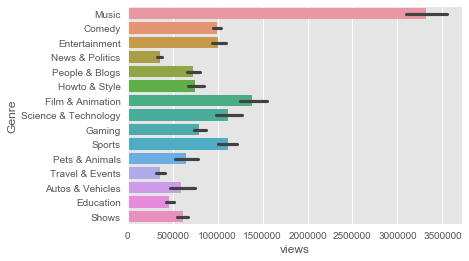

In [40]:
sns.barplot(y=CA_genre, x=CA_concat['views'])

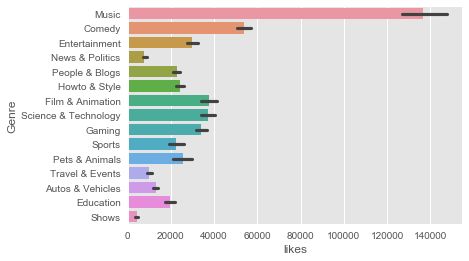

In [41]:
sns.barplot(y=CA_genre, x=CA_concat['likes'])

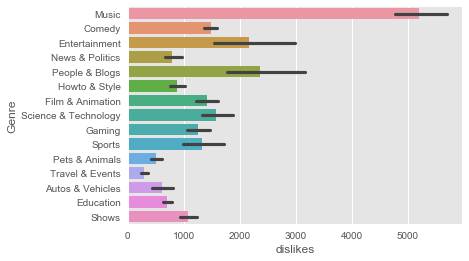

In [42]:
sns.barplot(y=CA_genre, x=CA_concat['dislikes'])

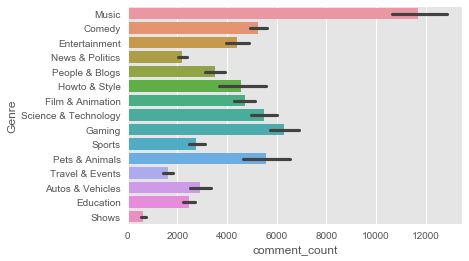

In [43]:
sns.barplot(y=CA_genre, x=CA_concat['comment_count'])

### Germany genre analysis

In [44]:
DE_csv = pd.read_csv("DEvideos.csv")

In [45]:
DE_json = pd.read_json("DE_category_id.json", orient='columns', typ='frame', dtype=True, convert_axes=True,)

In [46]:
#rename category_id to id
DE_csv_df = DE_csv.rename(columns={'category_id': 'id'})

In [47]:
genre = makeDataFrame(DE_json)

In [48]:
genre.dtypes

Genre    object
id       object
dtype: object

In [49]:
#Need to cast both id's to the same type
genre['id'] = genre['id'].astype(int)

In [50]:
DE_concat = pd.merge(DE_csv_df, genre, on=['id'],how='left')

In [51]:
DE_concat.head()

,video_id,trending_date,title,channel_title,id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Genre
0,LgVi6y5QIjM,17.14.11,Sing zu Ende! | Gesangseinlagen vom Feinsten |...,inscope21,24,2017-11-13T17:08:49.000Z,"inscope21|""sing zu ende""|""gesangseinlagen""|""ge...",252786,35885,230,1539,https://i.ytimg.com/vi/LgVi6y5QIjM/default.jpg,False,False,False,Heute gibt es mal wieder ein neues Format... w...,Entertainment
1,Bayt7uQith4,17.14.11,Kinder ferngesteuert im Kiosk! Erwachsene abzo...,LUKE! Die Woche und ich,23,2017-11-12T22:30:01.000Z,"Kinder|""ferngesteuert""|""Kinder ferngesteuert""|...",797196,53576,302,1278,https://i.ytimg.com/vi/Bayt7uQith4/default.jpg,False,False,False,Kinder ferngesteuert! Kinder lassen sich sooo ...,Comedy
2,1ZAPwfrtAFY,17.14.11,The Trump Presidency: Last Week Tonight with J...,LastWeekTonight,24,2017-11-13T07:30:00.000Z,"last week tonight trump presidency|""last week ...",2418783,97190,6146,12703,https://i.ytimg.com/vi/1ZAPwfrtAFY/default.jpg,False,False,False,"One year after the presidential election, John...",Entertainment
3,AHtypnRk7JE,17.14.11,Das Fermi-Paradoxon,100SekundenPhysik,27,2017-11-12T15:00:01.000Z,"Physik|""Wissenschaft""|""Technik""|""Science-Ficti...",380247,31821,458,1955,https://i.ytimg.com/vi/AHtypnRk7JE/default.jpg,False,False,False,►Alle Videos: http://bit.ly/1fa7Tw3\n\n\n✚Snap...,Education
4,ZJ9We4bjcg0,17.14.11,18 SONGS mit Kelly MissesVlog (Sing-off),rezo,24,2017-11-12T13:10:36.000Z,"kelly|""missesvlog""|""kelly song""|""bausa""|""bausa...",822213,100684,2467,10244,https://i.ytimg.com/vi/ZJ9We4bjcg0/default.jpg,False,False,False,18 Song Mashup über den (veränderten) Beat von...,Entertainment


In [52]:
DE_genre = CA_concat['Genre']

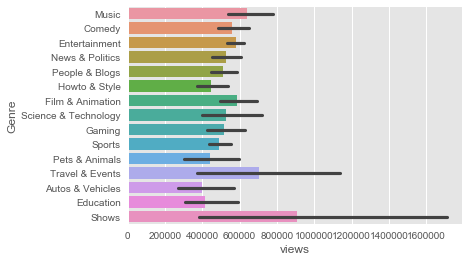

In [53]:
sns.barplot(y=DE_genre, x=DE_concat['views'])

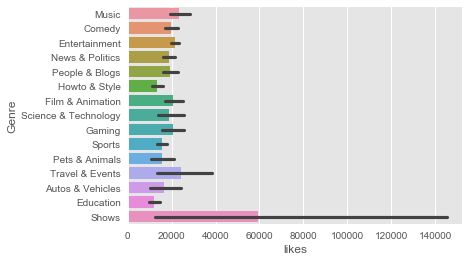

In [54]:
sns.barplot(y=DE_genre, x=DE_concat['likes'])

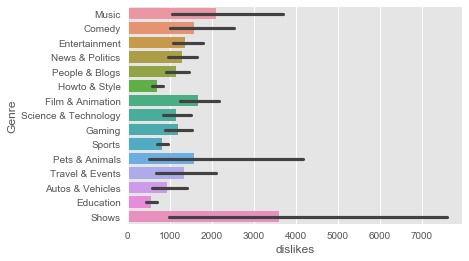

In [55]:
sns.barplot(y=DE_genre, x=DE_concat['dislikes'])

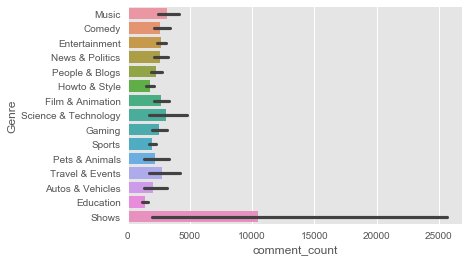

In [56]:
sns.barplot(y=DE_genre, x=DE_concat['comment_count'])

### France genre analysis

In [57]:
FR_csv = pd.read_csv("FRvideos.csv")

In [58]:
FR_csv.head(1)

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13T17:32:55.000Z,"Raptor|""Dissident""|""Expliquez""|""moi""|""cette""|""...",212702,29282,1108,3817.0,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...


In [59]:
FR_json = pd.read_json("FR_category_id.json", orient='columns', typ='frame', dtype=True, convert_axes=True,)

In [60]:
#rename category_id to id
FR_csv_df = FR_csv.rename(columns={'category_id': 'id'})

In [61]:
FR_genre = makeDataFrame(FR_json)

In [62]:
#Need to cast both id's to the same type
FR_genre['id'] = FR_genre['id'].astype(int)

In [63]:
FR_genre['id'].dtypes

dtype('int64')

In [64]:
FR_concat = pd.merge(FR_csv_df, FR_genre, on=['id'],how='left')

In [65]:
#FR_concat = pd.concat([FR_csv_df, genre],axis=1)

In [66]:
FR_concat.head()

,video_id,trending_date,title,channel_title,id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Genre
0,Ro6eob0LrCY,17.14.11,Malika LePen : Femme de Gauche - Trailer,Le Raptor Dissident,24,2017-11-13T17:32:55.000Z,"Raptor|""Dissident""|""Expliquez""|""moi""|""cette""|""...",212702,29282,1108,3817.0,https://i.ytimg.com/vi/Ro6eob0LrCY/default.jpg,False,False,False,Dimanche.\n18h30.\nSoyez présents pour la vidé...,Entertainment
1,Yo84eqYwP98,17.14.11,"LA PIRE PARTIE ft Le Rire Jaune, Pierre Croce,...",Le Labo,24,2017-11-12T15:00:02.000Z,[none],432721,14053,576,1161.0,https://i.ytimg.com/vi/Yo84eqYwP98/default.jpg,False,False,False,Le jeu de société: https://goo.gl/hhG1Ta\n\nGa...,Entertainment
2,ceqntSXE-10,17.14.11,DESSINS ANIMÉS FRANÇAIS VS RUSSES 2 - Daniil...,Daniil le Russe,23,2017-11-13T17:00:38.000Z,"cartoon|""pokémon""|""école""|""ours""|""мультфильм""",482153,76203,477,9580.0,https://i.ytimg.com/vi/ceqntSXE-10/default.jpg,False,False,False,Une nouvelle dose de dessins animés français e...,Comedy
3,WuTFI5qftCE,17.14.11,PAPY GRENIER - METAL GEAR SOLID,Joueur Du Grenier,20,2017-11-12T17:00:02.000Z,"Papy grenier|""Metal Gear Solid""|""PS1""|""Tirage ...",925222,85016,550,4303.0,https://i.ytimg.com/vi/WuTFI5qftCE/default.jpg,False,False,False,"Nouvel ,épisode de Papy Grenier ! Ce mois-ci o...",Gaming
4,ee6OFs8TdEg,17.14.11,QUI SAUTERA LE PLUS HAUT ? (VÉLO SKATE ROLLER ...,Aurelien Fontenoy,17,2017-11-13T16:30:03.000Z,"vélo|""vtt""|""bmx""|""freestyle""|""bike""|""mtb""|""dir...",141695,8091,72,481.0,https://i.ytimg.com/vi/ee6OFs8TdEg/default.jpg,False,False,False,Sauts à plus de 4 mètres de haut dans un tramp...,Sports


In [67]:
FR_concat.dtypes

video_id                   object
trending_date              object
title                      object
channel_title              object
id                          int64
publish_time               object
tags                       object
views                      object
likes                      object
dislikes                   object
comment_count             float64
thumbnail_link             object
comments_disabled          object
ratings_disabled           object
video_error_or_removed     object
description                object
Genre                      object
dtype: object

In [68]:
#sns.barplot(y=FR_genre, x=FR_concat['views'])

### Concatenate all files into one large csv

In [74]:
files=[GB_concat,US_concat,CA_concat,DE_concat]
csvs = []
for file in files:
    #if file.endswith(".csv"):
        csvs.append(file)

In [78]:
data=pd.DataFrame()
for i in csvs:
    table=pd.read_csv(i)
    data=pd.concat([data,table])

ValueError: Invalid file path or buffer object type: <class 'pandas.core.frame.DataFrame'>

In [77]:
csvs

[          video_id trending_date  \
 0      Jw1Y-zhQURU      17.14.11   
 1      3s1rvMFUweQ      17.14.11   
 2      n1WpP7iowLc      17.14.11   
 3      PUTEiSjKwJU      17.14.11   
 4      rHwDegptbI4      17.14.11   
 5      AumaWl0TNBo      17.14.11   
 6      2Vv-BfVoq4g      17.14.11   
 7      -N5eucPMTTc      17.14.11   
 8      LMCuKltaY3M      17.14.11   
 9      9t9u_yPEidY      17.14.11   
 10     ONQ-fAp5X64      17.14.11   
 11     Dlwf5u2BLAg      17.14.11   
 12     NVCqz2BDfcQ      17.14.11   
 13     MyEqfBkzESU      17.14.11   
 14     b4vTZx_AtHk      17.14.11   
 15     BsfhHKx6ajA      17.14.11   
 16     DIU3xPdhCBI      17.14.11   
 17     pz95u3UVpaM      17.14.11   
 18     jp9hK-jY6yY      17.14.11   
 19     gEHCXl4J9Qo      17.14.11   
 20     OWvCCu2t6Ts      17.14.11   
 21     6p-QzY5bxJ0      17.14.11   
 22     fiusxyygqGk      17.14.11   
 23     QOksZ8VogRw      17.14.11   
 24     lo5ERI5nPbM      17.14.11   
 25     Ja_GMU7-sjs      17.14.11   
 

In [82]:
GB_US_concat = pd.concat([GB_concat,US_concat], axis=0)
#vertical_stack = pd.concat([survey_sub, survey_sub_last10], axis=0)


In [83]:
GB_US_CA_concat = pd.concat([GB_US_concat,CA_concat],axis=0)

In [84]:
GB_US_CA_DE_concat = pd.concat([GB_US_CA_concat,DE_concat],axis=0)

In [86]:
GB_US_CA_DE_concat

,video_id,trending_date,title,channel_title,id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,Genre
0,Jw1Y-zhQURU,17.14.11,John Lewis Christmas Ad 2017 - #MozTheMonster,John Lewis,26,2017-11-10T07:38:29.000Z,"christmas|""john lewis christmas""|""john lewis""|...",7224515,55681,10247,9479,https://i.ytimg.com/vi/Jw1Y-zhQURU/default.jpg,False,False,False,Click here to continue the story and make your...,Howto & Style
1,3s1rvMFUweQ,17.14.11,Taylor Swift: …Ready for It? (Live) - SNL,Saturday Night Live,24,2017-11-12T06:24:44.000Z,"SNL|""Saturday Night Live""|""SNL Season 43""|""Epi...",1053632,25561,2294,2757,https://i.ytimg.com/vi/3s1rvMFUweQ/default.jpg,False,False,False,Musical guest Taylor Swift performs …Ready for...,Entertainment
2,n1WpP7iowLc,17.14.11,Eminem - Walk On Water (Audio) ft. Beyoncé,EminemVEVO,10,2017-11-10T17:00:03.000Z,"Eminem|""Walk""|""On""|""Water""|""Aftermath/Shady/In...",17158579,787420,43420,125882,https://i.ytimg.com/vi/n1WpP7iowLc/default.jpg,False,False,False,Eminem's new track Walk on Water ft. Beyoncé i...,Music
3,PUTEiSjKwJU,17.14.11,Goals from Salford City vs Class of 92 and Fri...,Salford City Football Club,17,2017-11-13T02:30:38.000Z,"Salford City FC|""Salford City""|""Salford""|""Clas...",27833,193,12,37,https://i.ytimg.com/vi/PUTEiSjKwJU/default.jpg,False,False,False,Salford drew 4-4 against the Class of 92 and F...,Sports
4,rHwDegptbI4,17.14.11,Dashcam captures truck's near miss with child ...,Cute Girl Videos,25,2017-11-13T01:45:13.000Z,[none],9815,30,2,30,https://i.ytimg.com/vi/rHwDegptbI4/default.jpg,False,False,False,Dashcam captures truck's near miss with child ...,News & Politics
5,AumaWl0TNBo,17.14.11,How My Relationship Started!,PointlessBlogVlogs,24,2017-11-11T17:00:00.000Z,"pointlessblog|""pointlessblogtv""|""pointlessblog...",1182775,52708,1431,2333,https://i.ytimg.com/vi/AumaWl0TNBo/default.jpg,False,False,False,► HOW MY RELATIONSHIP STARTED!\n► PB Merch • h...,Entertainment
6,2Vv-BfVoq4g,17.14.11,Ed Sheeran - Perfect (Official Music Video),Ed Sheeran,10,2017-11-09T11:04:14.000Z,"edsheeran|""ed sheeran""|""acoustic""|""live""|""cove...",33523622,1634124,21082,85067,https://i.ytimg.com/vi/2Vv-BfVoq4g/default.jpg,False,False,False,🎧: https://ad.gt/yt-perfect\n💰: https://atlant...,Music
7,-N5eucPMTTc,17.14.11,CHRISTMAS HAS GONE TO MY HEAD,MoreZoella,22,2017-11-10T19:19:43.000Z,"zoe sugg|""zoella""|""zoe""|""vlog""|""vlogging""|""vlo...",1164201,57309,749,624,https://i.ytimg.com/vi/-N5eucPMTTc/default.jpg,False,False,False,CHRISTMAS HAS GONE TO MY HEAD\nPrevious Vlog: ...,People & Blogs
8,LMCuKltaY3M,17.14.11,Elbow - Golden Slumbers (John Lewis Advert 2017),ElbowVEVO,10,2017-11-10T08:00:01.000Z,"Elbow|""Golden""|""Slumbers""|""Polydor""|""Alternative""",154494,2163,147,211,https://i.ytimg.com/vi/LMCuKltaY3M/default.jpg,False,False,False,"“Golden Slumbers”, originally by The Beatles, ...",Music
9,9t9u_yPEidY,17.14.11,"Jennifer Lopez - Amor, Amor, Amor (Official Vi...",JenniferLopezVEVO,10,2017-11-10T15:00:00.000Z,"Jennifer Lopez ft. Wisin|""Jennifer Lopez ft. W...",9548677,190084,15015,11473,https://i.ytimg.com/vi/9t9u_yPEidY/default.jpg,False,False,False,"Jennifer Lopez ft. Wisin - Amor, Amor, Amor (O...",Music


In [88]:
GB_US_CA_DE_concat.shape

(114631, 17)

In [89]:
# Write DataFrame to CSV
#vertical_stack.to_csv('data_output/out.csv', index=False)

In [85]:
#pd.merge(GB_concat,US_concat,CA_concat,DE_concat)